In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal



#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

In [2]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
path = "../data/"
fname = "肉を焼く2"
acc = pd.read_csv(path+fname+"/"+"acc.csv",encoding = 'utf-8')

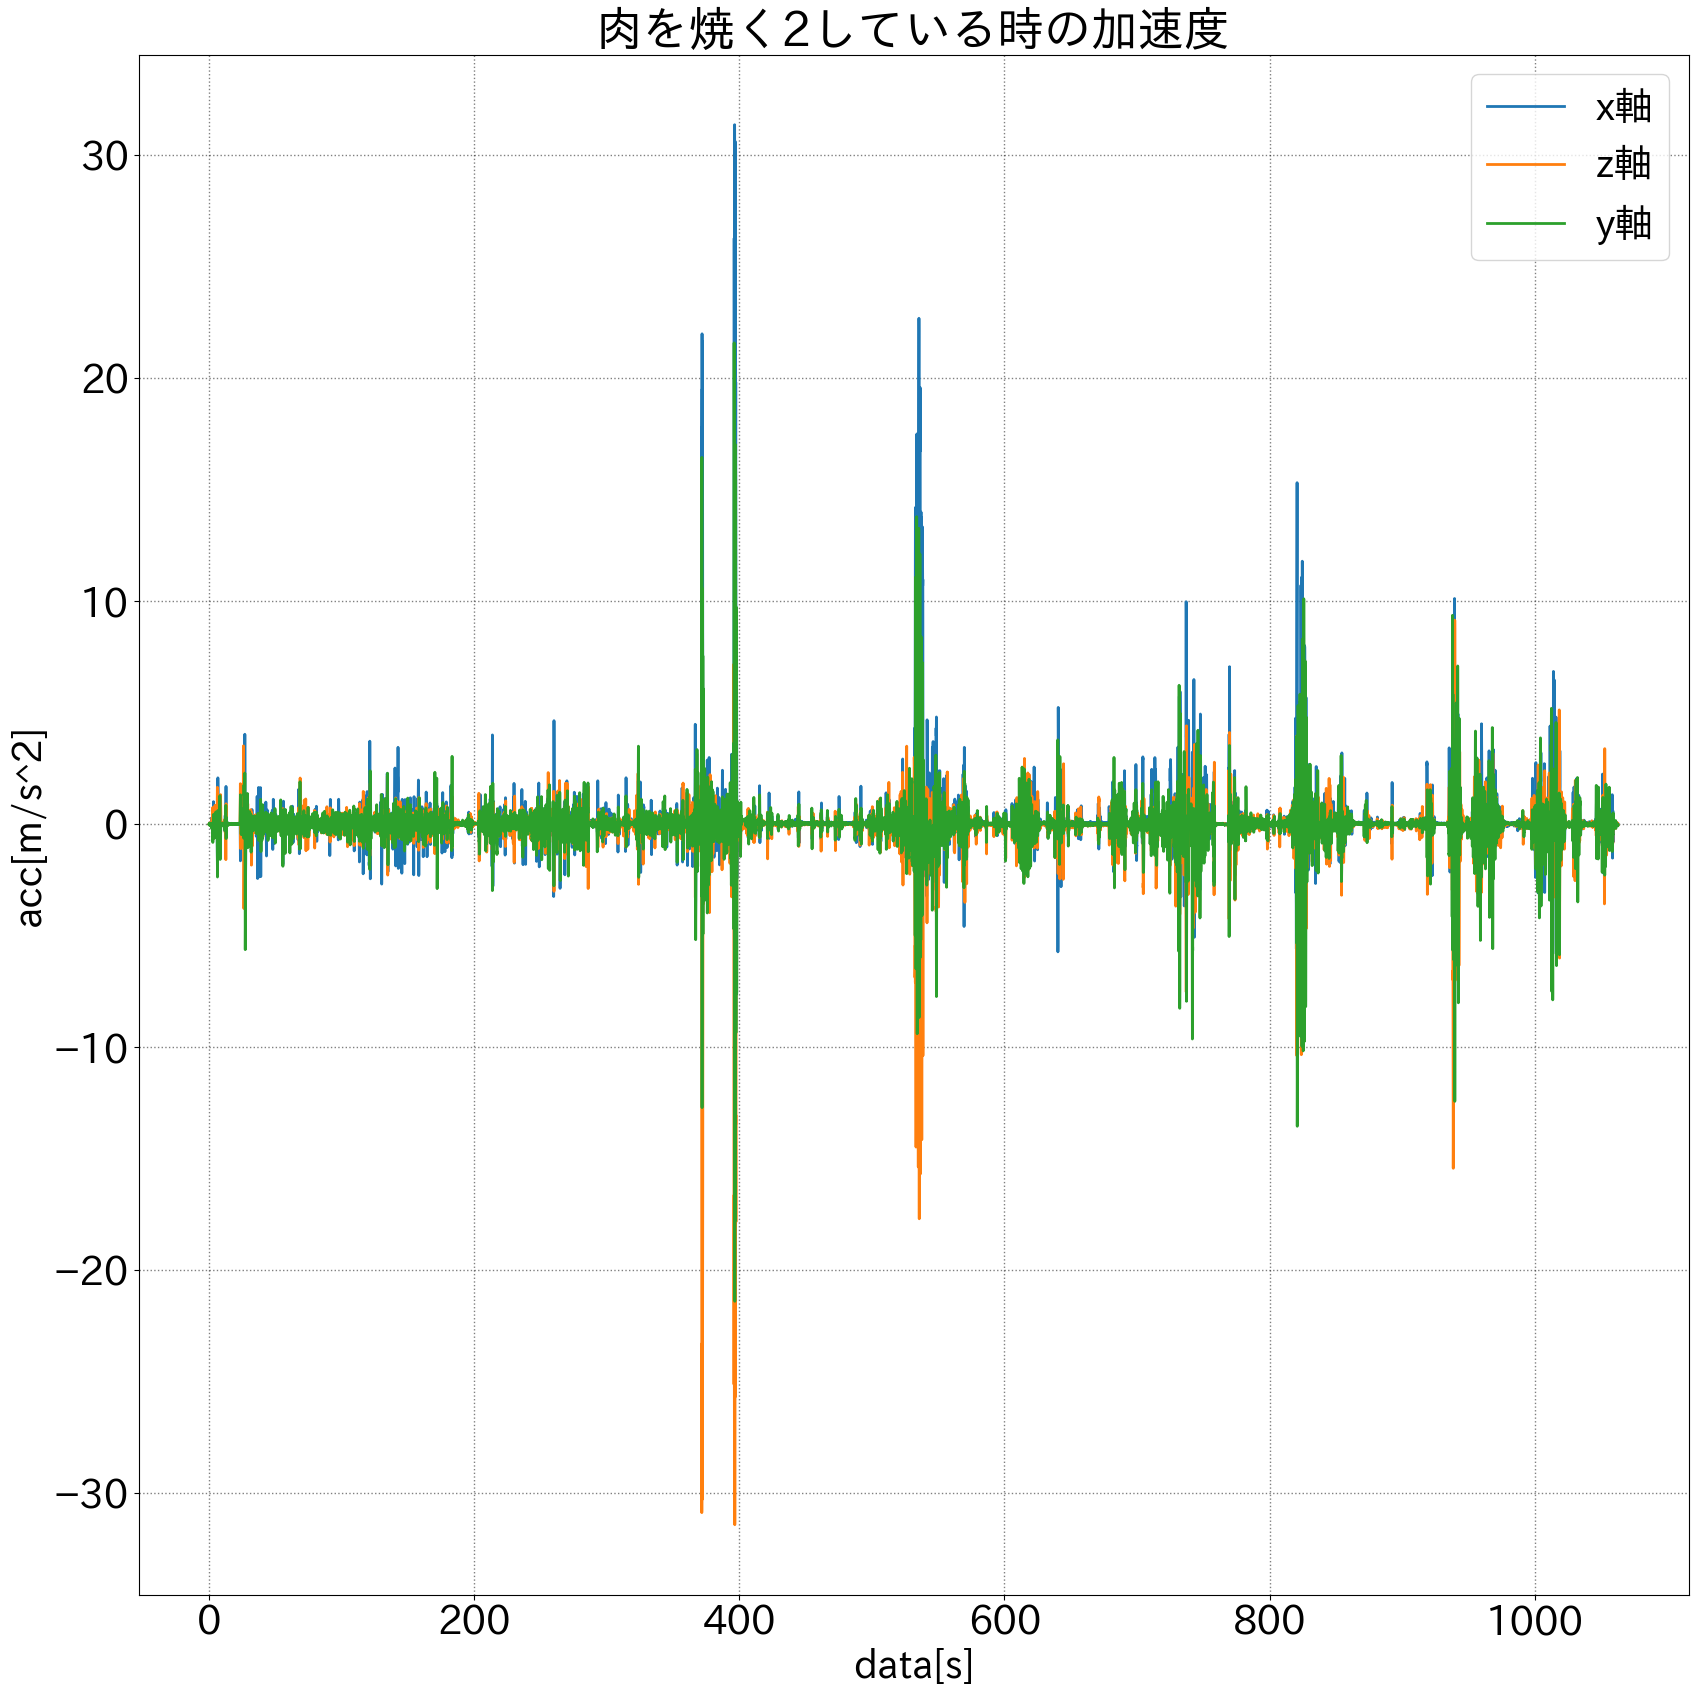

In [3]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title(fname+"している時の加速度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["x"].rolling(window=5).mean(),
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["z"].rolling(window=5).mean(),
    label="z軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["y"].rolling(window=5).mean(),
    label="y軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()


plt.show()

max: 77.45193610052104
min: 0.0028823093271004175
median: 0.5216957057858961
25%: 0.18666639607064864
75%: 1.2341072117019534
outlier_min: -1.3844948273763082
outlier_max: 2.8052684351489106
outlier_max: 2.063636280508766
outlier_max: 1.9911053626931126
outlier_max: 1.9478947588399587
outlier_max: 2.458681930935998
outlier_max: 3.495066787396776
outlier_max: 0.7069747035829436
outlier_max: 4.183064554502089
outlier_max: 2.7205455129861833
outlier_max: 2.859479418124904
outlier_max: 3.797955328724514
outlier_max: 3.5851357665464425
outlier_max: 4.592863927371724
outlier_max: 4.386862617367518
outlier_max: 0.8044203544793005


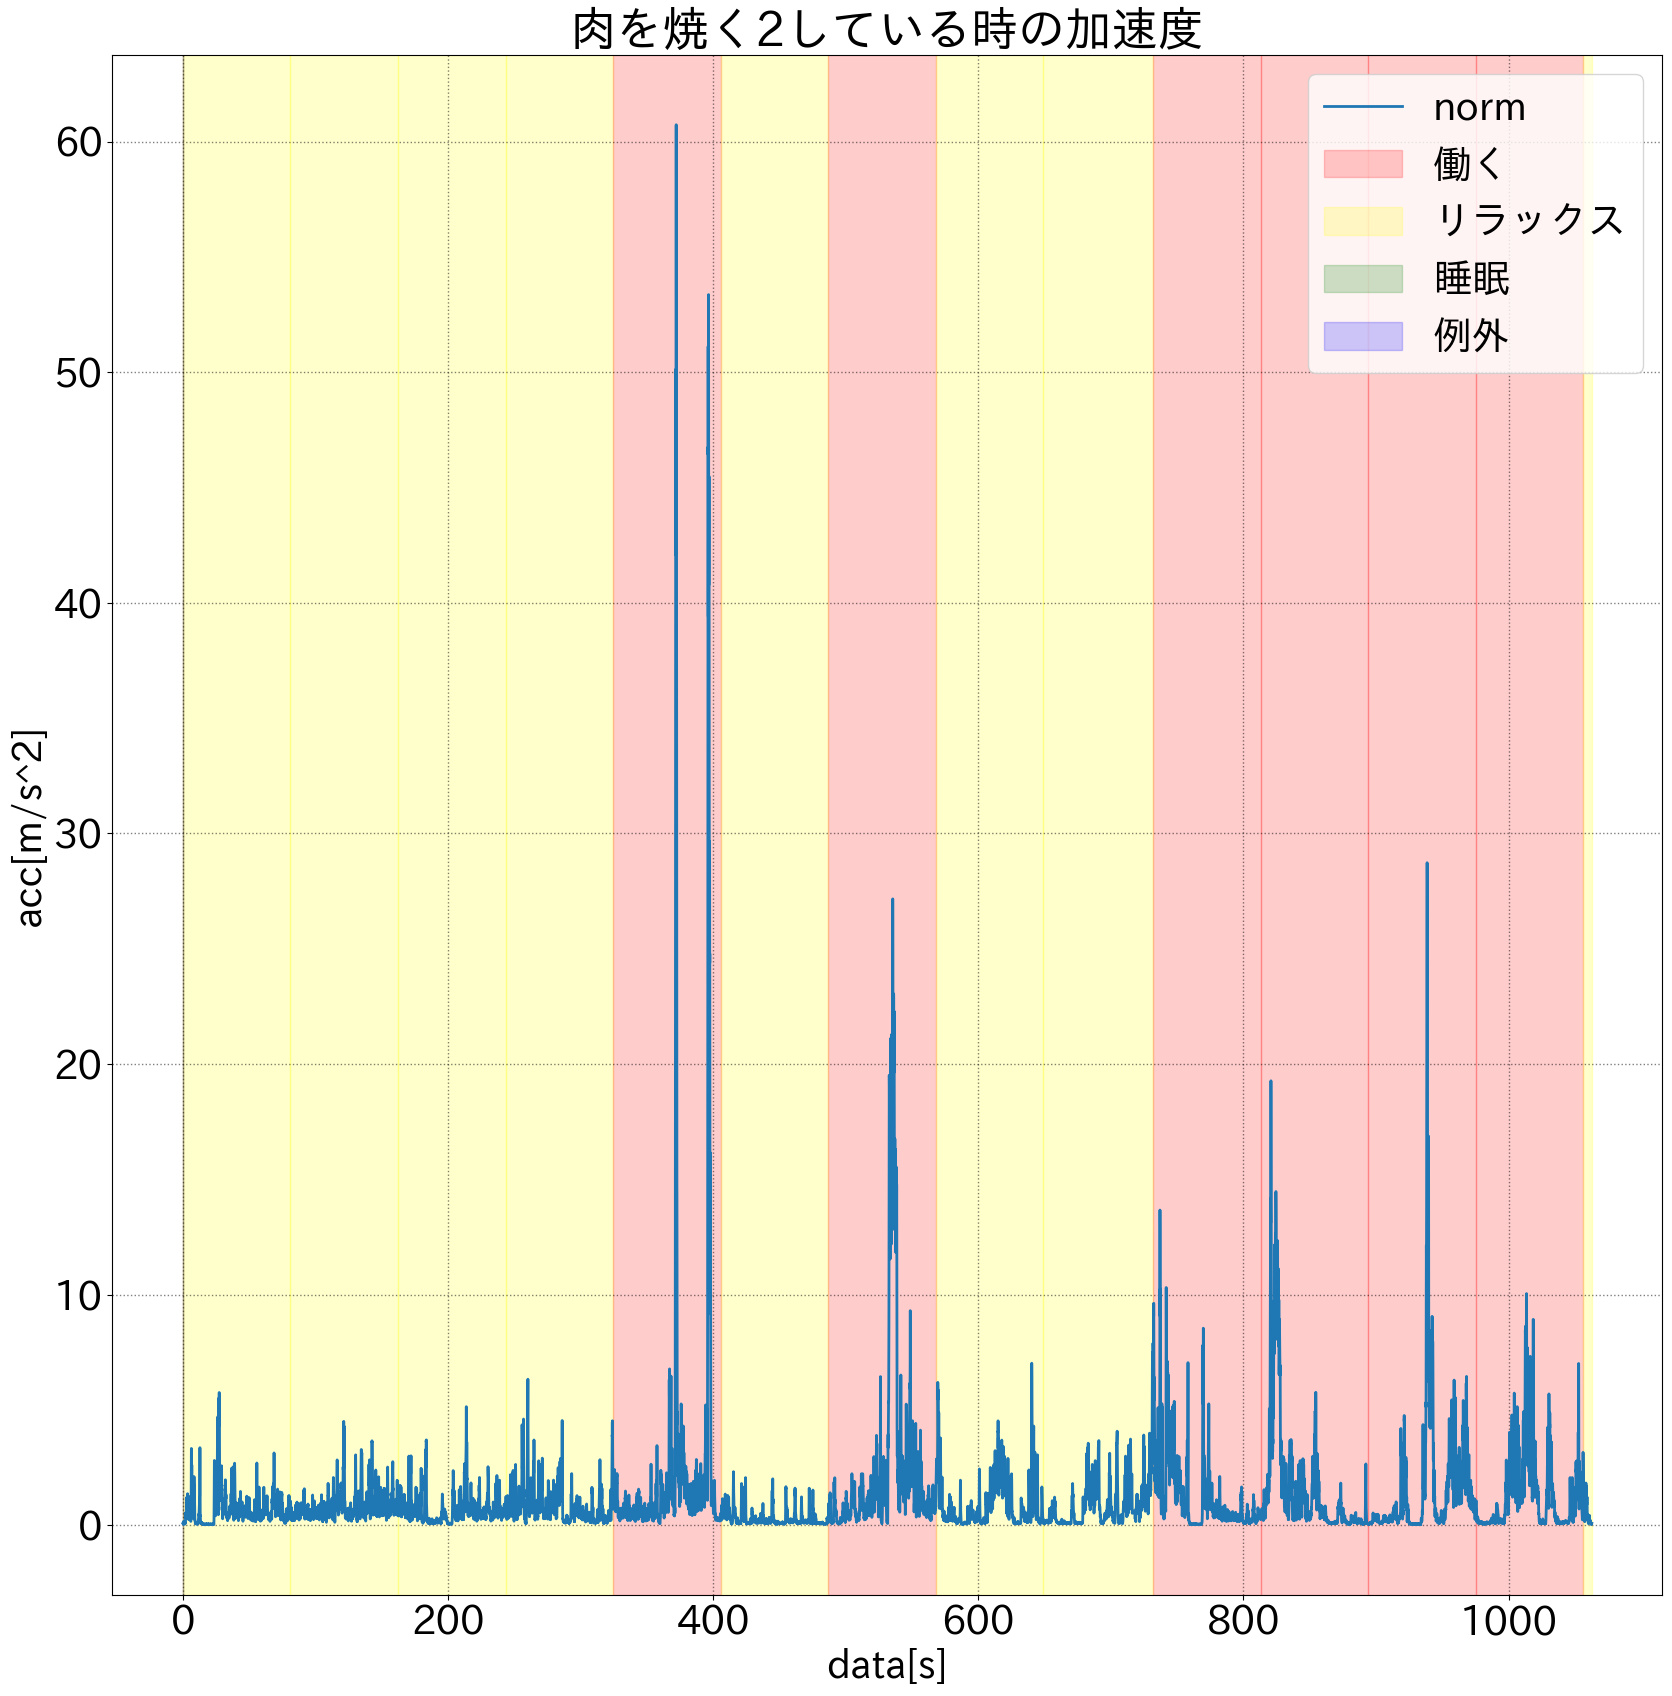

In [4]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title(fname+"している時の加速度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
norm = np.sqrt(acc["x"]**2 + acc["y"]**2 + acc["z"]**2)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    norm.rolling(window=5).mean(),
    label="norm",
    linewidth=2,  # 線の太さを指定
)

# 箱ひげ図の最大値、最小値、中央値、四分位数を計算する
print("max:", np.max(norm))   
print("min:", np.min(norm))
print("median:", np.median(norm))
print("25%:", np.percentile(norm, 25))
print("75%:", np.percentile(norm, 75))

# 箱の高さを計算する
iqr = np.percentile(norm, 75) - np.percentile(norm, 25)

# 外れ値の基準点を計算する
outlier_min = np.percentile(norm, 25) - iqr * 1.5
outlier_max = np.percentile(norm, 75) + iqr * 1.5
print("outlier_min:", outlier_min)
print("outlier_max:", outlier_max)


wark_division = 3.0
relax_division = 0.5
sleep_division = 0.0

# 200データごとに区切り、箱ひげ図を作成する
windowSize = 2000
for i in range(0, len(norm), windowSize):
    now_norm = norm[i:i+windowSize]

    # 箱の高さを計算する
    now_iqr = np.percentile(now_norm, 75) - np.percentile(now_norm, 25)

    # 外れ値の基準点を計算する
    outlier_max = np.percentile(now_norm, 75) + now_iqr * 1.5
    print("outlier_max:", outlier_max)
    
    # グラフの背景色を変える
    start_time = (acc["time"][i] - acc["time"][0])/ 1000
    if i+windowSize >= len(acc["time"]):
        end_time = (acc["time"][len(acc["time"])-1] - acc["time"][0]) / 1000
    else:
        end_time = (acc["time"][i+windowSize] - acc["time"][0]) / 1000

    # outlier_maxがdivisionより大きい場合グラフの背景色を変える
    if outlier_max > wark_division:
        ax3.axvspan(start_time, end_time, color="red", alpha=0.2)
    elif outlier_max > relax_division:
        ax3.axvspan(start_time, end_time, color="yellow", alpha=0.2)
    elif outlier_max > sleep_division:
        ax3.axvspan(start_time, end_time, color="green", alpha=0.2)
    else:
        ax3.axvspan(start_time, end_time, color="blue", alpha=0.2)


# 背景色の凡例を作成する
ax3.axvspan(0, 0, color="red", alpha=0.2, label="働く")
ax3.axvspan(0, 0, color="yellow", alpha=0.2, label="リラックス")
ax3.axvspan(0, 0, color="green", alpha=0.2, label="睡眠")
ax3.axvspan(0, 0, color="blue", alpha=0.2, label="例外")




ax3.legend()
plt.show()

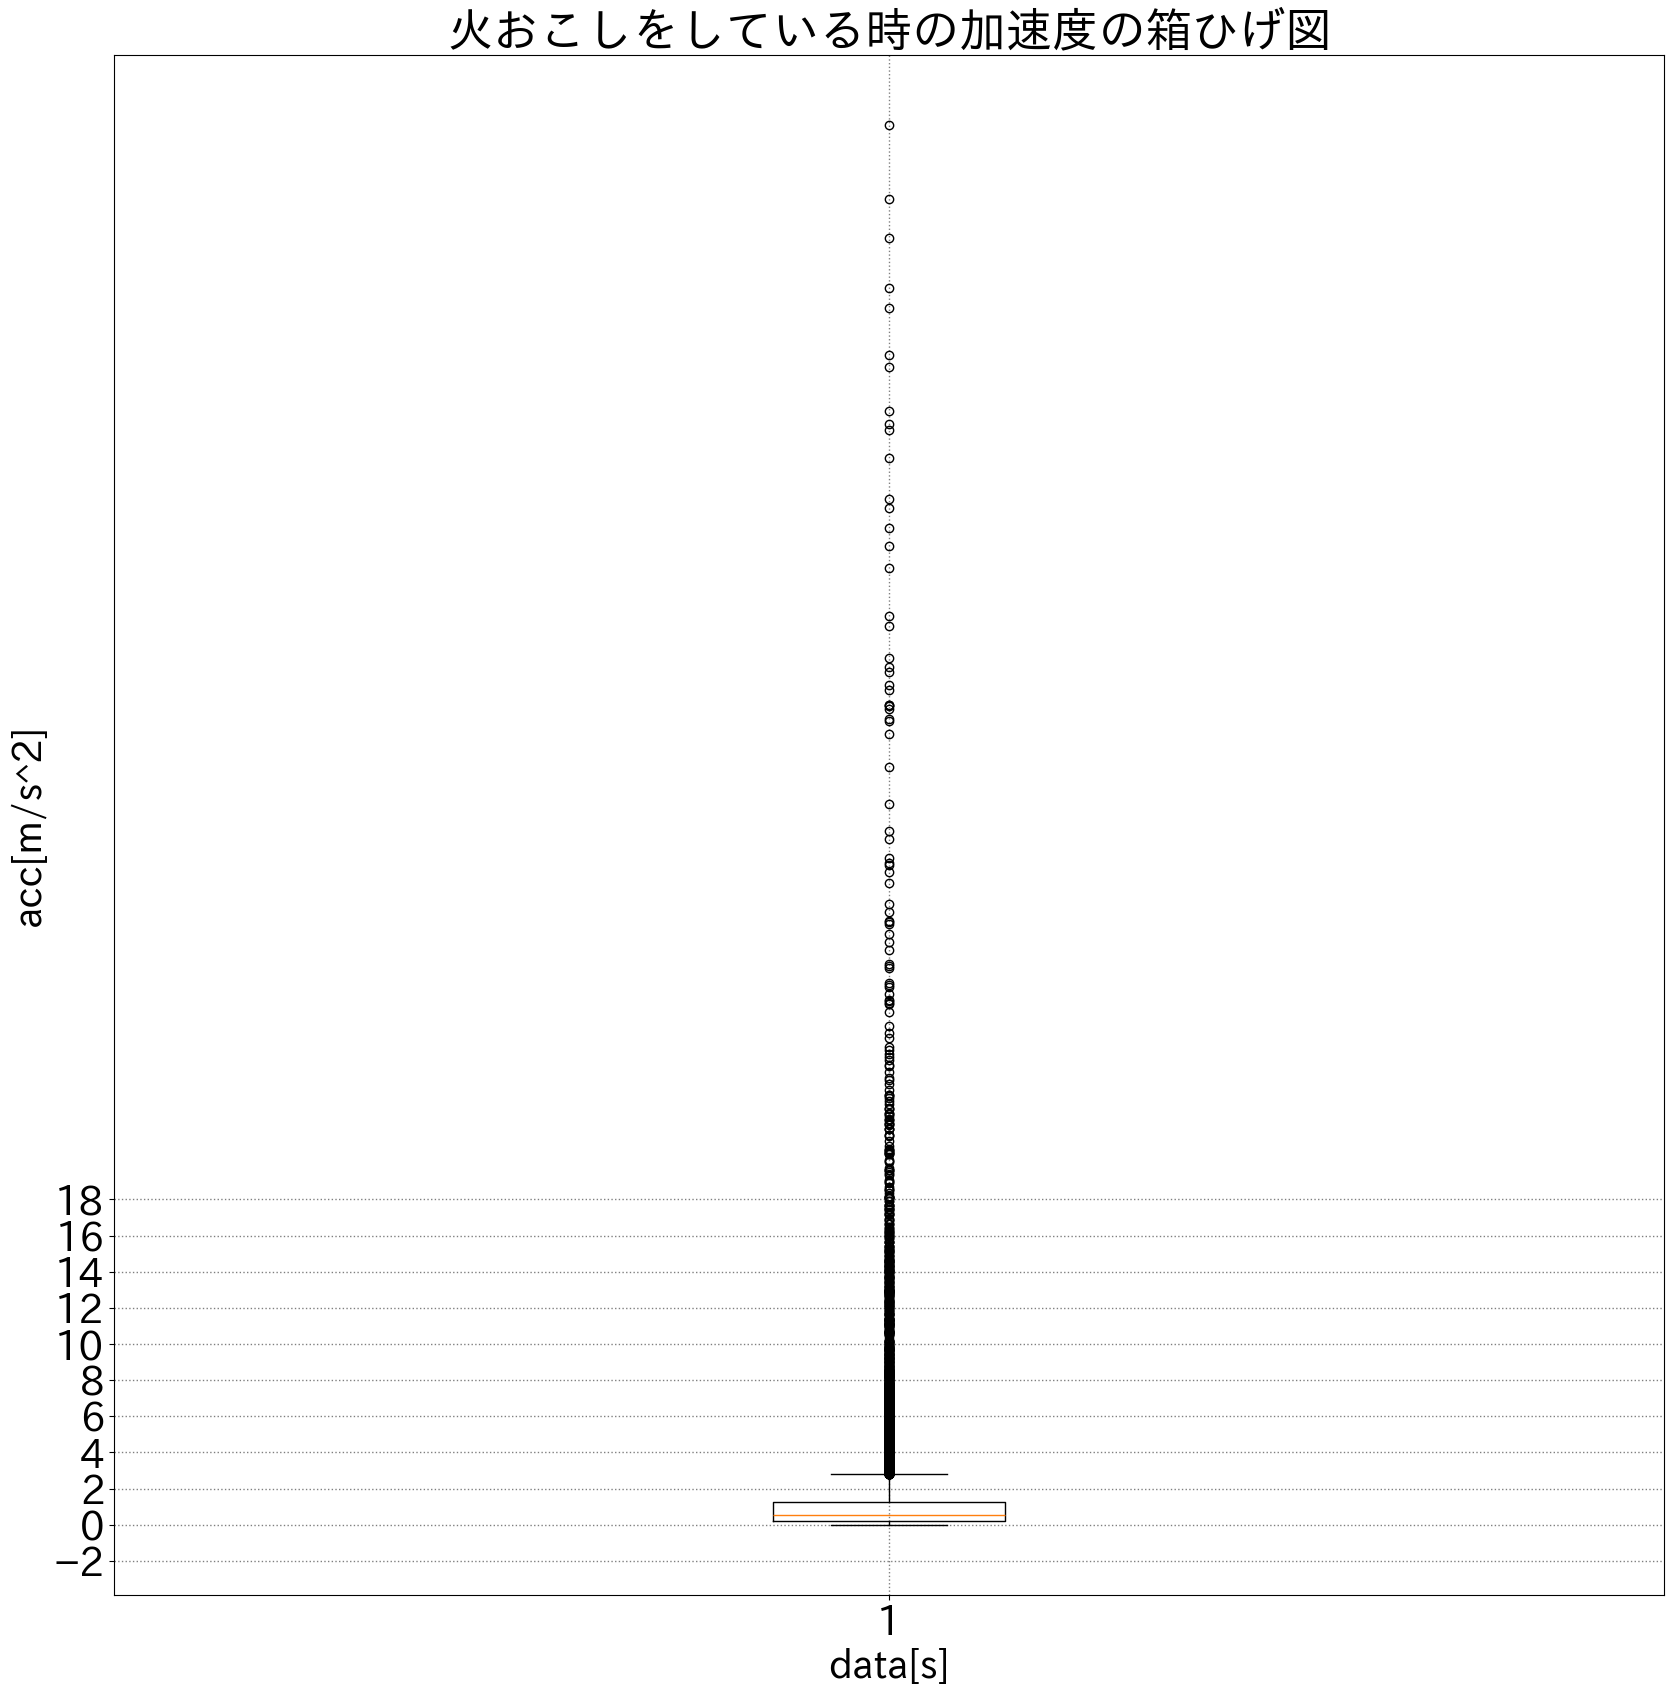

In [5]:
# グリッドの設定などはここで行います
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax3.set_title("火おこしをしている時の加速度の箱ひげ図")
ax3.set_xlabel('data[s]')
ax3.set_ylabel('acc[m/s^2]')
ax3.get_yaxis().get_major_formatter().set_useOffset(False)

# メモリは2m/s^2刻み
ax3.set_yticks(np.arange(-20, 20, 2))

norm = np.sqrt(acc["x"]**2 + acc["y"]**2 + acc["z"]**2)

# 箱ひげ図を描画
ax3.boxplot(norm)

# グラフを表示
plt.show()
